In [1]:
# packages for data analysis
import numpy as np
import pandas as pd

from sklearn import svm

# visualize your data 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

# Pickle Package
import pickle

In [3]:
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


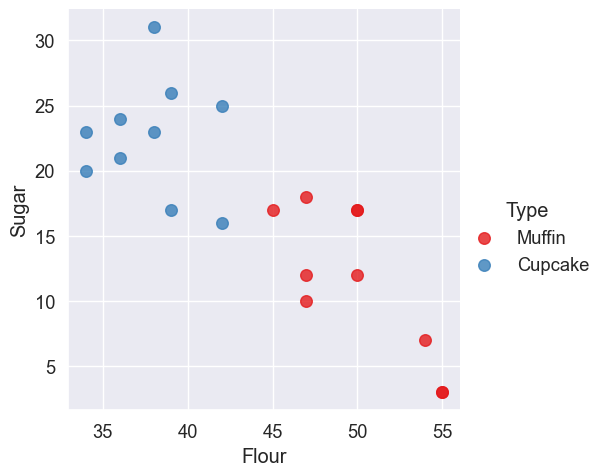

In [9]:
# plot our data
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [14]:
type_label=np.where(recipes['Type']=='Muffin', 0, 1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[['Flour', 'Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [62]:
# fit model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)
print(ingredients)
print(type_label)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [63]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]
print("----w = variable 2 coeff (m and c) y=mx+c 2-D plane ------")
print(w)
print("-----a = slope generating-----")
print(a)
print("----xx = create line values between 30-60 -----")
print(xx)
print("----yy = (slope) * x(which is each value in array) + c(which is model intercept) -----")
print(yy)
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
print("----b = support vectors_line -----")
print(b)
yy_down = a * xx + (b[1] - a * b[0])
print("----yy_down-----")
print(yy_down)
b = model.support_vectors_[-1]
print("----b = support vectors_line -----")
print(b)
yy_up = a * xx + (b[1] - a * b[0])
print("----yy_up-----")
print(yy_up)

----w = variable 2 coeff (m and c) y=mx+c 2-D plane ------
[-6.66503014e-01 -7.77156117e-16]
-----a = slope generating-----
-857617921181270.0
----xx = create line values between 30-60 -----
[30.         30.6122449  31.2244898  31.83673469 32.44897959 33.06122449
 33.67346939 34.28571429 34.89795918 35.51020408 36.12244898 36.73469388
 37.34693878 37.95918367 38.57142857 39.18367347 39.79591837 40.40816327
 41.02040816 41.63265306 42.24489796 42.85714286 43.46938776 44.08163265
 44.69387755 45.30612245 45.91836735 46.53061224 47.14285714 47.75510204
 48.36734694 48.97959184 49.59183673 50.20408163 50.81632653 51.42857143
 52.04081633 52.65306122 53.26530612 53.87755102 54.48979592 55.10204082
 55.71428571 56.32653061 56.93877551 57.55102041 58.16326531 58.7755102
 59.3877551  60.        ]
----yy = (slope) * x(which is each value in array) + intercept(which is modelintercept) -----
[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751

Plot Value Points


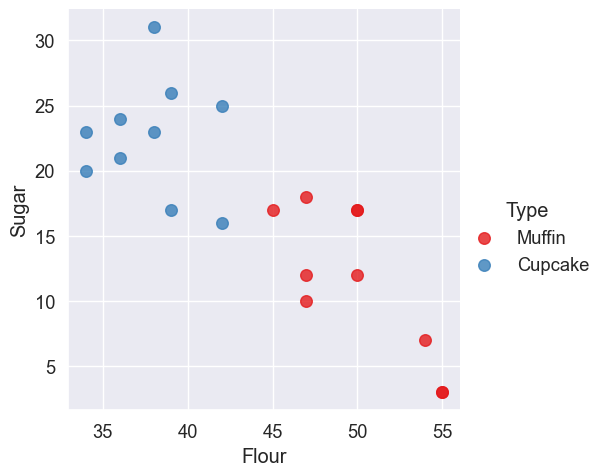

In [66]:
# Plot the hyperplane
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
print("Plot Value Points")

Plot Line


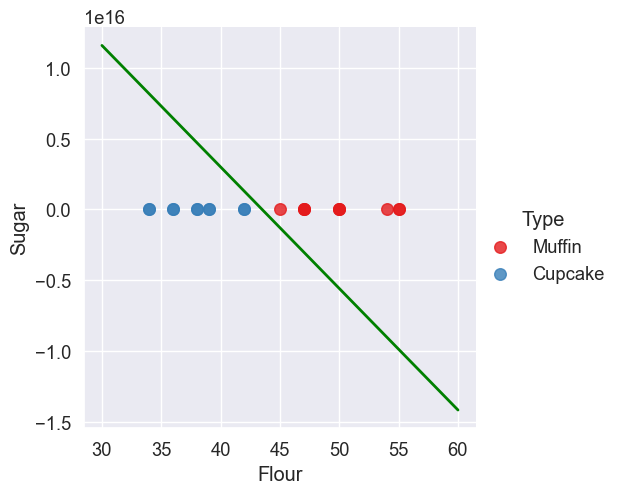

In [68]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='green');
print("Plot Line")

Plot Up and Down Lines


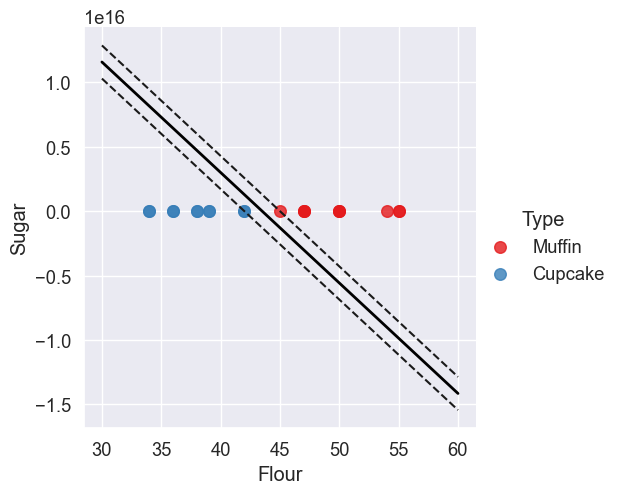

In [69]:
# Look at the margins and support vectors
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');
print("Plot Up and Down Lines")

In [70]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')
print("predictive muffin-cupcake function")

predictive muffin-cupcake function


In [72]:
# Predict if 50 parts flour and 20 parts sugar
print("running muffin-cupcake function:")
muffin_or_cupcake(50, 20)


running muffin-cupcake function:
You're looking at a muffin recipe!


Adding yellow point


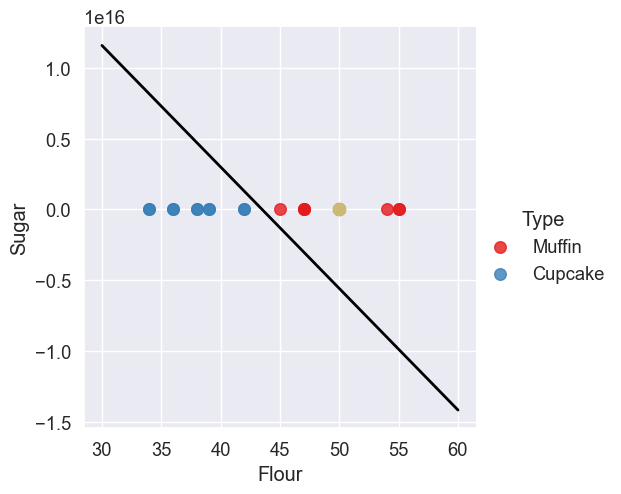

In [73]:
# Plot the point to visually see where the point lies
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');
print("Adding yellow point")

In [56]:
# Predict if 65 parts flour and 10 parts sugar
muffin_or_cupcake(65,10)

You're looking at a muffin recipe!


In [57]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}
print(muffin_cupcake_dict)

{'muffin_cupcake_model': SVC(kernel='linear'), 'muffin_cupcake_features': ['Flour', 'Sugar'], 'all_features': ['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']}


In [46]:
muffin_cupcake_dict

{'muffin_cupcake_model': SVC(kernel='linear'),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}